In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


#Reading the data

zoo = pd.read_csv('GalaxyZoo1_DR_table2.csv')
zoo.head(20)

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1
5,587727180060098638,00:00:01.57,-09:29:40.3,28,0.857,0.000,0.036,0.000,0.107,0.000,0.036,0.830,0.060,0,0,1
6,587731187277627676,00:00:01.86,+00:43:09.3,38,0.500,0.000,0.053,0.289,0.105,0.053,0.342,0.351,0.473,0,0,1
7,587727223024189605,00:00:02.00,+15:41:49.8,26,0.423,0.000,0.000,0.577,0.000,0.000,0.577,0.143,0.857,1,0,0
8,587730775499407375,00:00:02.10,+15:52:54.2,62,0.355,0.016,0.210,0.323,0.000,0.097,0.548,0.355,0.548,0,0,1
9,587727221950382424,00:00:02.41,+14:49:19.0,31,0.484,0.129,0.065,0.258,0.065,0.000,0.452,0.109,0.789,1,0,0


In [13]:
data = zoo.drop(['OBJID','RA','DEC'],axis=1)

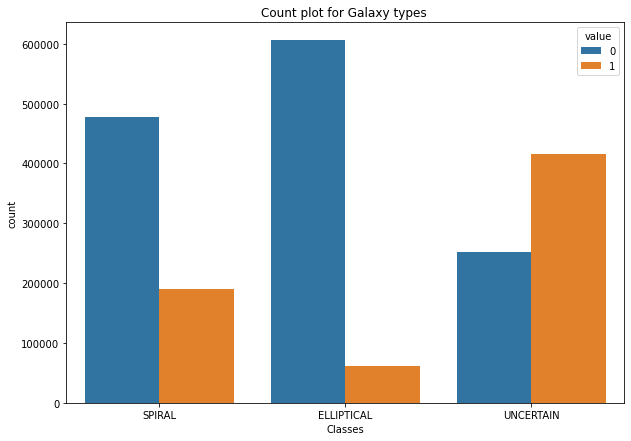

In [14]:
plt.figure(figsize=(10,7))
plt.title('Count plot for Galaxy types ')
countplt = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']]
sns.countplot(x="variable",hue='value', data=pd.melt(countplt))
plt.xlabel('Classes')
plt.show()

In [15]:
X = data.drop(['SPIRAL','ELLIPTICAL','UNCERTAIN'],axis=1).values
y = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
# normalising the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
import time
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
start = time.perf_counter()

In [18]:
model.fit(x=X_train,y=y_train,epochs=20)
print('\nTIME ELAPSED {}Seconds'.format(time.perf_counter() - start))

Epoch 1/20
4175/4175 [==============================] - 4s 912us/step - loss: 0.2124 - accuracy: 0.9002
Epoch 2/20
4175/4175 [==============================] - 4s 988us/step - loss: 0.2125 - accuracy: 0.9003
Epoch 3/20
4175/4175 [==============================] - 4s 932us/step - loss: 0.2126 - accuracy: 0.9005
Epoch 4/20
4175/4175 [==============================] - 4s 946us/step - loss: 0.2122 - accuracy: 0.9002
Epoch 5/20
4175/4175 [==============================] - 4s 966us/step - loss: 0.2126 - accuracy: 0.9000
Epoch 6/20
4175/4175 [==============================] - 4s 948us/step - loss: 0.2125 - accuracy: 0.9003
Epoch 7/20
4175/4175 [==============================] - 4s 966us/step - loss: 0.2123 - accuracy: 0.9004
Epoch 8/20
4175/4175 [==============================] - 4s 995us/step - loss: 0.2122 - accuracy: 0.9007
Epoch 9/20
4175/4175 [==============================] - 4s 972us/step - loss: 0.2123 - accuracy: 0.9007
Epoch 10/20
4175/4175 [==============================] - 4s 1ms/